In [2]:
# Initialize Otter
import otter
grader = otter.Notebook("project.ipynb")

# Final Project <a class='tocSkip'>
    
## PSTAT 134/234 (Fall 2023) <a class='tocSkip'>
    
## Collaboration Policy <a class='tocSkip'>

Data science is a collaborative activity. While you may talk with others about
the homework, we ask that you **write your solutions individually**. If you do
discuss the assignments with others please **include their names** at the top
of your notebook.

**Collaborators**: *list collaborators here*

In [3]:
%xmode Verbose

Exception reporting mode: Verbose


<!-- BEGIN QUESTION -->

## Question 1: Using Linear Algebra for Optimization
In recommender system module, low-rank matrix factorization was used to execute latent factor modeling of movie ratings data.

Specifically, we calculated matrices $U$ and $V$ to solve the following optimization problem (if all ratings were given):
$$
\begin{aligned}
\min_{U,V} f(U,V) &= \min_{U,V} \|R - V U^T\|_F^2
=\min_{U,V} \left\{ \sum_{m=1}^M\sum_{i=1}^I I_{mi}(r_{mi} - v_m u_i^T)^2 \right\},
\end{aligned}
$$
where
$$
\begin{aligned}
I_{mi} = \begin{cases}
1 \text{, if $r_{mi}$ is observed}\\
0 \text{, if $r_{mi}$ is missing.}\\
\end{cases}
\end{aligned}
$$

The best $U$ and $V$ were calculated iteratively by improving on current estimates:
$$
\begin{aligned}
u_i^{\text{new}} &= u_i + 2\alpha(r_{mi} -  v_m u_i^T)\cdot v_m\\
v_m^{\text{new}} &= v_m + 2\alpha(r_{mi} -  v_m u_i^T)\cdot u_i,
\end{aligned}
$$
where $\alpha$ is the step-size that is to be chosen by the user. (We won't discuss the role in this class, but treat it as an arbitrary, but given, parameter) 

We can make calculating the updates more efficient by calculating them with matrix operations. For example, instead of calculating each deviation $\gamma_{mi} = r_{mi} - v_m u_i^T$ separately for all $m=1,2,\dots,M$ and $i=1,2,\dots,I$, matrix $\Gamma$ of all deviations can be computed together using matrix operation _(verify for yourself)_:
$$\Gamma = R - VU^T$$

Similarly, updating $U$ and $V$ can be combined into matrix calculations which makes the optimization procedure more efficient.

First, note that updates for $u_i$, $i=1,2,\dots,I$ can be rewritten as
$$
\begin{aligned}
u_1^{\text{new}} &= u_1 + 2\alpha\gamma_{m1}\cdot v_m\\
u_2^{\text{new}} &= u_2 + 2\alpha\gamma_{m2}\cdot v_m\\
\vdots\quad &\qquad\qquad\vdots\\
u_I^{\text{new}} &= u_I + 2\alpha\gamma_{mI}\cdot v_m.
\end{aligned}
$$
Stacking all $I$ equations into a matrix form, 
$$
\begin{aligned}
U^{\text{new}} &= U + 2\alpha\Gamma_{m-}^T v_m,
\end{aligned}
$$
where $\Gamma_{m-}$ is the $m$-th row of $\Gamma$ (use the notation $\Gamma_{-i}$ for the $i$-th column). When evaluating $U^{\text{new}}$, the latest updated values of $U$, $V$, and $\Gamma$ are used.

Note that there are $M$ such update equations (one for each $m=1,2,\dots,M$) that can also be combined into one matrix update equation involving matrices $U$, $V$, $\Gamma$ and scalars. As stated earlier, since $\alpha$ is assumed to be an arbitrary step-size parameter, we can replace $\alpha/M$ with $\alpha$.

### Question 1a: Using Linear Algebra for Optimization

Complete the following update equations:
$$
\begin{aligned}
U^{\text{new}} &= U + 2\alpha[\text{some function of }\Gamma][\text{some function of }V]\\
V^{\text{new}} &= V + 2\alpha[\text{some function of }\Gamma][\text{some function of }U]
\end{aligned}
$$

**SOLUTION**

To complete the update equations, let express the terms involving $\Gamma$ and $V$ in terms of matrix operations. Recall that $\Gamma = R - VU^T$, and we'll use this information to find the expressions:

$$
\begin{aligned}
U^{\text{new}} &= U + 2\alpha[\text{some function of }\Gamma][\text{some function of }V]\\
V^{\text{new}} &= V + 2\alpha[\text{some function of }\Gamma][\text{some function of }U]
\end{aligned}
$$

For $U^{\text{new}}$:

$$
\begin{aligned}
U^{\text{new}} &= U + 2\alpha[\text{some function of }\Gamma][\text{some function of }V]\\
&= U + 2\alpha(\Gamma V)
\end{aligned}
$$

Explanation: We use $\Gamma V$ to get a matrix whose $i$-th column is $\Gamma_{m-}^T v_m$. The multiplication by $2\alpha$ is then applied element-wise.

For $V^{\text{new}}$:

$$
\begin{aligned}
V^{\text{new}} &= V + 2\alpha[\text{some function of }\Gamma][\text{some function of }U]\\
&= V + 2\alpha(\Gamma^T U)
\end{aligned}
$$

Explanation: We use $\Gamma^T U$ to get a matrix whose $m$-th column is $\Gamma_{m-}^T u_m$. The multiplication by $2\alpha$ is then applied element-wise.

So, the complete update equations are:

$$
\begin{aligned}
U^{\text{new}} &= U + 2\alpha(\Gamma V)\\
V^{\text{new}} &= V + 2\alpha(\Gamma^T U)
\end{aligned}
$$


<!-- END QUESTION -->

### Question 1b: Implementing Updates

In this problem, you will implement the updates calculated in the previous problem. Define the following three functions:

* `update_G(R, U, V)`: computes deviation $R-VU^T$
* `update_U(G, U, V, alpha=0.01)`: calculates update $U^{\text{new}}$
* `update_V(G, U, V, alpha=0.01)`: calculates update $V^{\text{new}}$

Each function should only be one line of matrix operations. Three functions is to be applied sequentially, using the most up-to-date estimates of $G$, $U$, and $V$.

Since some elements of `R` are `np.nan` for any missing ratings, `update_U` and `update_V` functions need to be adjusted by using `numpy.nan_to_num` function where appropriate. The function `numpy.nan_to_num` will let you replace `NaN` to some number, so that missing ratings do not interfere with updates.

In [4]:
import numpy as np
import pandas as pd

def update_G(R, U, V):
    return R - np.dot(V, U.T)

def update_U(G, U, V, alpha=0.01):
    return U + 2 * alpha * np.dot(np.nan_to_num(G.T), V)

def update_V(G, U, V, alpha=0.01):
    return V + 2 * alpha * np.dot(np.nan_to_num(G), U)


np.random.seed(1)

M_ = 5
I_ = 3
K_ = 2

R_ = np.random.rand(M_, I_).round(1)
R_[0, 0] = R_[3, 2] = np.nan
U_ = np.random.rand(I_, K_).round(1)
V_ = np.random.rand(M_, K_).round(1)
G_ = update_G(R_, U_, V_)


In [5]:
grader.check("q1b")

q1b results: All test cases passed!

### Question 1c: Construct Optimization Algorithm

Combine the above functions to implement the optimization algorithm to iteratively compute $U$ and $V$.

But, first, here are functions that will calculate RMSE and quantify the maximum update (in absolute value) made by `update_U` and `update_V` after they are called.

In [6]:
def rmse(X):
    """
    Computes root-mean-square-error, ignoring nan values
    """
    return np.sqrt(np.nanmean(X**2))

def max_update(X, Y, relative=True):
    """
    Compute elementwise maximum update
    
    parameters:
    - X, Y: numpy arrays or vectors
    - relative: [True] compute relative magnitudes
    
    returns
    - maximum difference between X and Y (relative to Y) 
    
    """
    if relative:
        updates = np.nan_to_num((X - Y)/Y)
    else:
        updates = np.nan_to_num(X - Y)
            
    return np.linalg.norm(updates.ravel(), np.inf)

A template for the optimization algorithm is given below. Fill-in the missing portions to complete the algorithm.

In [7]:
def compute_UV(Rdf, K=5, alpha=0.01, max_iteration=5000, diff_thr=1e-3):

    R = Rdf.values
    Rone = pd.DataFrame().reindex_like(Rdf).replace(np.nan, 1) # keep data frame metadata

    M, I = R.shape            # number of movies and users
    U = np.random.rand(I, K)  # initialize with random numbers
    V = np.random.rand(M, K)  # initialize with random numbers
    G = update_G(R, U, V)     # calculate residual

    track_rmse = []
    track_update = []
    for i in range(0, max_iteration): 
        
        Unew = update_U(G, U, V, alpha)
        Gnew = update_G(R, Unew, V)

        Vnew = update_V(Gnew, Unew, V, alpha)
        Gnew = update_G(R, Unew, Vnew)

        track_rmse += [{
            'iteration': i, 
            'rmse': rmse(Gnew),
            'max residual change': max_update(Gnew, G, relative=False)
        }]
        track_update += [{
            'iteration': i, 
            'max update': max(max_update(Unew, U), max_update(Vnew, V))
        }]

        U = Unew
        V = Vnew
        G = Gnew
        
        if track_update[-1]['max update'] < diff_thr:
            break
        
    track_rmse = pd.DataFrame(track_rmse)
    track_update = pd.DataFrame(track_update)
    
    kindex = pd.Index(range(0, K), name='k')
    U = pd.DataFrame(U, index=Rdf.columns, columns=kindex)
    V = pd.DataFrame(V, index=Rdf.index, columns=kindex)
    
    return {
        'U': U, 'V': V,
        'rmse': track_rmse,
        'update': track_update
    }

Rsmall = pd.read_pickle('data/ratings_stacked_small.pkl').unstack()

np.random.seed(134) # set seed for tests
output1 = compute_UV(Rsmall, K=10, alpha=0.001)


In [8]:
grader.check("q1c")

q1c results: All test cases passed!

Running the function on a different sized problem to check if `compute_UV` adapts to changing problem sizes.
There is nothing new to do here

In [9]:
# These tests should pass if `compute_UV` works properly
np.random.seed(134) # set seed for tests
output2 = compute_UV(Rsmall.iloc[:7, :5], K=8)

In [10]:
## TEST ##
output2['U'].shape

(5, 8)

In [11]:
## TEST ##
print((output2['V']@output2['U'].T).round(2))

                                   rating                        
user id                               1     85    269   271   301
movie id movie title                                             
132      Wizard of Oz, The (1939)    4.00  5.00  5.00  5.00  4.01
238      Raising Arizona (1987)      4.00  2.00  5.00  4.00  3.01
748      Saint, The (1997)           1.92  1.53  1.97  1.47  1.52
196      Dead Poets Society (1989)   5.00  4.00  1.00  4.00  4.00
197      Graduate, The (1967)        5.00  5.00  5.00  4.00  5.01
185      Psycho (1960)               4.00  3.67  5.00  3.00  3.80
194      Sting, The (1973)           4.01  4.01  5.00  5.00  3.99


In [12]:
## TEST ##
output2['V'].shape

(7, 8)

In [13]:
## TEST ##
output2['U'].index

MultiIndex([('rating',   1),
            ('rating',  85),
            ('rating', 269),
            ('rating', 271),
            ('rating', 301)],
           names=[None, 'user id'])

In [14]:
## TEST ##
output2['V'].index

MultiIndex([(132,  'Wizard of Oz, The (1939)'),
            (238,    'Raising Arizona (1987)'),
            (748,         'Saint, The (1997)'),
            (196, 'Dead Poets Society (1989)'),
            (197,      'Graduate, The (1967)'),
            (185,             'Psycho (1960)'),
            (194,         'Sting, The (1973)')],
           names=['movie id', 'movie title'])

In [15]:
## TEST ##
output2['U'].columns

RangeIndex(start=0, stop=8, step=1, name='k')

In [16]:
## TEST ##
output2['V'].columns

RangeIndex(start=0, stop=8, step=1, name='k')

<!-- BEGIN QUESTION -->

### Question 1d: Interpret Diagnostic Plots

Following figures tell us if the optimization algorithm is working properly.

In [17]:
import altair as alt
logscale = alt.Scale(type='log', base=10)
fig_rmse = \
    alt.Chart(output1['rmse'])\
    .mark_line()\
    .encode(
        x='iteration:Q', 
        y=alt.Y('rmse:Q', scale=logscale)
    )
fig_max_residual_change = \
    alt.Chart(output1['rmse'])\
    .mark_line()\
    .encode(
        x='iteration:Q', 
        y=alt.Y('max residual change:Q', scale=logscale)
    )
fig_updates = \
    alt.Chart(output1['update'])\
    .mark_line()\
    .encode(
        x='iteration:Q', 
        y=alt.Y('max update:Q', scale=logscale)
    )
alt.vconcat(
    fig_rmse | fig_max_residual_change,
    fig_updates 
)

alt.VConcatChart(...)

By referring back to the function used to calculate the quantities in each figure, describe what each figure is showing and interpret the behavior of the optimization algorithm.

**SOLUTION**

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Question 1e: Analyze Large Dataset

Following code will analyze a larger dataset:

In [18]:
# run on larger dataset: ratings for 100 movies 
Rbig = pd.read_pickle('data/ratings_stacked.pkl').unstack().iloc[:100]

np.random.seed(14) # set seed for tests
output3 = compute_UV(Rbig, K=5, alpha=0.001, max_iteration=500)

Rhatbig = output3['V']@output3['U'].T

In [19]:
fit_vs_obs = pd.concat([
    Rhatbig.rename(columns={'rating':'fit'}),
    Rbig.rename(columns={'rating':'observed'}),
], axis=1).stack().dropna().reset_index()[['fit','observed']]

fit_vs_obs = fit_vs_obs.iloc[np.random.choice(len(fit_vs_obs), 5000)]

alt.Chart(fit_vs_obs).transform_density(
    density='fit',
    bandwidth=0.01,
    groupby=['observed'],
    extent= [0, 6]
).mark_bar().encode(
    alt.X('value:Q'),
    alt.Y('density:Q'),
    alt.Row('observed:N')
).properties(width=800, height=50)

alt.Chart(...)

In [20]:
fit_vs_obs = pd.concat([
    Rhatbig.rename(columns={'rating':'fit'}),
    Rbig.rename(columns={'rating':'observed'}),
], axis=1).stack().dropna().reset_index()[['fit','observed']]

fit_vs_obs = fit_vs_obs.iloc[np.random.choice(len(fit_vs_obs), 5000)]

alt.Chart(fit_vs_obs).transform_density(
    density='fit',
    bandwidth=0.01,
    groupby=['observed'],
    extent= [0, 6],
    counts=True
).mark_bar().encode(
    alt.X('value:Q'),
    alt.Y('density:Q'),
    alt.Row('observed:N')
).properties(width=800, height=50)

alt.Chart(...)

Consider the above plot. By reading the code, comment on what the plot is illustrating. What happens when you add `counts=True` to `transform_density`? What can you conclude?

**SOLUTION**

With counts=True, the second plot provides additional information on the data distribution by showing the count of data points contributing to each density estimate. This can be useful to assess the reliability and significance of the density estimates. Higher counts indicate more data points in that region, providing a sense of the data's density and distribution.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Question 1f: Make Recommendation

What movies would you recommend to `user id` 601? Do you see any similarities to movies the user rated high?

**SOLUTION**

In [21]:
# Extract latent factors for user 601
#user_601_latent_factors = output3['U'].xs(key=601, level='user id', axis=0, drop_level=False)

# Get the indices of the top-k latent factors (let's say top 5 for this example)
#top_k_indices = user_601_latent_factors.iloc[0].argsort()[-5:][::-1]

# Retrieve movie titles corresponding to the top-k latent factors
#recommended_movies = output3['V'].iloc[top_k_indices].index.get_level_values('movie title')

# Display the recommended movies
#recommended_movies

where_not_rated = Rbig.droplevel(level=0,axis=1).loc[:,601]#.index.levels[1] 
not_rated = where_not_rated[where_not_rated.isna()].index.get_level_values(1) 
Rbig.iloc[:,601]
idx = pd.IndexSlice
Rhatbig.droplevel(level=0, axis=1).loc[idx[:,not_rated],601].nlargest(10)

movie id  movie title                  
13        Mighty Aphrodite (1995)          4.000717
48        Hoop Dreams (1994)               3.844658
19        Antonia's Line (1995)            3.792223
14        Postino, Il (1994)               3.745982
26        Brothers McMullen, The (1995)    3.698932
59        Three Colors: Red (1994)         3.690157
23        Taxi Driver (1976)               3.661859
45        Eat Drink Man Woman (1994)       3.281692
61        Three Colors: White (1994)       3.266549
20        Angels and Insects (1995)        3.225736
Name: 601, dtype: float64

__Top 5 Movies:__ 

(1) Mighty Aphrodite
(2) Hoop Dreams
(3) Antonia’s Line
(4) Postino, Il
(5) Brothers McMullen 


Similarities: movies were made between 1994 and 1995. all explore interpersonal dynamics, according to ChatGPT

<!-- END QUESTION -->

## Question 2: Regularization

One of the common problems in machine learning is overfitting, and a common method that remedies overfitting is regularization.

Recall that we solved the following optimization problem
$$
\begin{aligned}
\min_{U,V} f(U,V) &= \min_{U,V} \|R - V U^T\|_F^2
=\min_{U,V} \left\{ \sum_{m=1}^M\sum_{i=1}^I I_{mi}(r_{mi} - v_m u_i^T)^2 \right\},
\end{aligned}
$$
where
$$
\begin{aligned}
I_{mi} = \begin{cases}
1 \text{, if $r_{mi}$ is observed}\\
0 \text{, if $r_{mi}$ is missing.}\\
\end{cases}
\end{aligned}
$$

To prevent overfitting, we can introduce $L_2$ regularization on both the user matrix and the movie matrix. Then the new optimization problem is

$$
\begin{aligned}
\min_{U,V} g(U,V) &=\min_{U,V} \|R - V U^T \|_F^2 + \lambda(\|U\|_F^2 + \|V\|_F^2)\\
&= \min_{U,V} \left\{ \sum_{m=1}^M\sum_{i=1}^I I_{mi}(r_{mi} - v_m u_i^T)^2 + \lambda (\sum_{i=1}^{I}\|u_i\|^2 + \sum_{m=1}^{M}\|v_m\|^2) \right\}\\
\end{aligned}
$$
where $\lambda$ is a tuning parameter that determines the strength of regularization.

<!-- BEGIN QUESTION -->

### Question 2a: Derive New Gradients and Update Rules

Based on the new objective function $g(U,V)$, derive its gradients and update rules for $U^{\text{new}}$ and $V^{\text{new}}$.

**SOLUTION**

In a vector form, gradients are

$$
\begin{aligned}
\frac{\partial}{\partial u_i} g(u_i, v_m) &= ...\\
\frac{\partial}{\partial v_m} g(u_i, v_m) &= ...
\end{aligned}
$$

By stacking equations, gradients can be expressed in a matrix form as

$$
\begin{aligned}
\frac{\partial}{\partial U} g(U,V) &= ...\\
\frac{\partial}{\partial V} g(U,V) &= ...
\end{aligned}
$$

Finally, the update rules are (in a matrix form)

$$
\begin{aligned}
U^{\text{new}} &= ...\\
V^{\text{new}} &= ...
\end{aligned}
$$

**SOLUTION**

In a vector form, gradients are

$$
\begin{aligned}
\frac{\partial}{\partial u_i} g(u_i, v_m) &= -2((r_{mi} - v_mu_i^T))v_m-\lambda u_i) \\
\frac{\partial}{\partial v_m} g(u_i, v_m) &=  -2((r_{mi} - v_mu_i^T))u_i-\lambda v_m)
\end{aligned}
$$

By stacking equations, gradients can be expressed in a matrix form as

$$
\begin{aligned}
\frac{\partial}{\partial U} g(U,V) &= -2\times (\Gamma^TV-\lambda U)\\
\frac{\partial}{\partial V} g(U,V) &=  -2\times (\Gamma U-\lambda V)
\end{aligned}
$$

Finally, the update rules are (in a matrix form)

$$
\begin{aligned}
U^{\text{new}} &= U + 2\times \alpha(\Gamma^TV-\lambda U)\\
V^{\text{new}} &= V + 2\times (\Gamma U-\lambda V)
\end{aligned}
$$

<!-- END QUESTION -->

### Question 2b: Implementing Updates

Implement new update functions similarly as in q1b.

In [22]:
import numpy as np

def update_G_reg(R, U, V):
    return R - np.dot(V, U.T)

def update_U_reg(G, U, V, lam, alpha=0.01):
    return U + 2 * alpha * (np.dot(np.nan_to_num(G.T), V) - lam * U)

def update_V_reg(G, U, V, lam, alpha=0.01):
    return V + 2 * alpha * (np.dot(np.nan_to_num(G), U) - lam * V)

# small test to help debug (keep intact)
np.random.seed(1)

M_ = 5
I_ = 3
K_ = 2
lam = 5.0

R_ = np.random.rand(M_, I_).round(1)
R_[0, 0] = R_[3, 2] = np.nan
U_ = np.random.rand(I_, K_).round(1)
V_ = np.random.rand(M_, K_).round(1)
G_ = update_G_reg(R_, U_, V_)

In [23]:
grader.check("q2b")

q2b results: All test cases passed!

### Question 2c: Construct Optimization Algorithm

Combine the above functions to implement the optimization algorithm to iteratively compute $U$ and $V$.

In [24]:
def compute_UV_reg(Rdf, K=5, lam=0.5, alpha=0.01, max_iteration=5000, diff_thr=1e-3):

    R = Rdf.values
    Rone = pd.DataFrame().reindex_like(Rdf).replace(np.nan, 1)  # keep data frame metadata

    M, I = R.shape            # number of movies and users
    U = np.random.rand(I, K)  # initialize with random numbers
    V = np.random.rand(M, K)  # initialize with random numbers
    G = update_G_reg(R, U, V)  # calculate residual

    track_rmse = []
    track_update = []
    for i in range(0, max_iteration):

        Unew = update_U_reg(G, U, V, lam, alpha)
        Gnew = update_G_reg(R, Unew, V)

        Vnew = update_V_reg(G, Unew, V, lam, alpha)
        Gnew = update_G_reg(R, Unew, Vnew)

        track_rmse += [{
            'iteration': i,
            'rmse': rmse(Gnew),
            'max residual change': max_update(Gnew, G, relative=False)
        }]
        track_update += [{
            'iteration': i,
            'max update': max(max_update(Unew, U), max_update(Vnew, V))
        }]

        U = Unew
        V = Vnew
        G = Gnew

        if track_update[-1]['max update'] < diff_thr:
            break

    track_rmse = pd.DataFrame(track_rmse)
    track_update = pd.DataFrame(track_update)

    kindex = pd.Index(range(0, K), name='k')
    U = pd.DataFrame(U, index=pd.Index(range(0, I), name='user id'), columns=kindex)
    V = pd.DataFrame(V, index=Rdf.index, columns=kindex)

    return {
        'U': U, 'V': V,
        'rmse': track_rmse,
        'update': track_update
    }

# Example usage
Rsmall = pd.read_pickle('data/ratings_stacked_small.pkl').unstack()

np.random.seed(134)  # set seed for tests
output4 = compute_UV_reg(Rsmall, K=10, lam=0.5, alpha=0.001)


In [25]:
def compute_UV_reg(Rdf, K=5, lam=0.5, alpha=0.01, max_iteration=5000, diff_thr=1e-3):

    R = Rdf.values
    Rone = pd.DataFrame().reindex_like(Rdf).replace(np.nan, 1) # keep data frame metadata

    M, I = R.shape            # number of movies and users
    U = np.random.rand(I, K)  # initialize with random numbers
    V = np.random.rand(M, K)  # initialize with random numbers
    G = update_G_reg(R, U, V)  # calculate residual

    track_rmse = []
    track_update = []
    for i in range(0, max_iteration): 

        Unew = update_U_reg(G, U, V, lam, alpha)
        Gnew = update_G_reg(R, Unew, V)

        Vnew = update_V_reg(Gnew, Unew, V, lam, alpha)
        Gnew = update_G_reg(R, Unew, Vnew)
        track_rmse += [{
            'iteration': i, 
            'rmse': rmse(Gnew),
            'max residual change': max_update(Gnew, G, relative=False)
        }]
        track_update += [{
            'iteration': i, 
            'max update': max(max_update(Unew, U), max_update(Vnew, V))
        }]

        U = Unew
        V = Vnew
        G = Gnew
        
        if track_update[-1]['max update'] < diff_thr:
            break
        
    track_rmse = pd.DataFrame(track_rmse)
    track_update = pd.DataFrame(track_update)
    
    kindex = pd.Index(range(0, K), name='k')
    U = pd.DataFrame(U, index=Rdf.columns, columns=kindex)
    V = pd.DataFrame(V, index=Rdf.index, columns=kindex)
    
    return {
        'U': U, 'V': V,
        'rmse': track_rmse,
        'update': track_update
    }
 
Rsmall = pd.read_pickle('data/ratings_stacked_small.pkl').unstack()

np.random.seed(134) # set seed for tests
output4 = compute_UV_reg(Rsmall, K=10, lam=0.5, alpha=0.001)


In [26]:
grader.check("q2c")

q2c results: All test cases passed!

# <!-- BEGIN QUESTION -->

### Question 2d: Investigating the Effects of Regularization

Adding the regularization terms to the objective function will affect the estimates of $U$ and $V$. Here, we consider comparing the user matrix $U$.

Using the dataset *Rsmall*, obtain two estimated user matrices, say $\hat{U}$ for a non-regularized model and $\hat{U}_{\text{reg}}$ for a regularized model. Select $K = 20$ and $\lambda = 5$. Come up with an effective visualization for comparing $\hat{U}$ and $\hat{U}_{\text{reg}}$, and describe any differences you notice. Additionally, analyze whether the observed differences in patterns align with the concept of regularization.

Provide reasoning supported by evidence, such as code implementation and results.

**SOLUTION**

In [27]:
# np.random.seed(134) # set seed for tests
output_noreg = compute_UV(Rsmall, K=10, alpha=0.001)
output_reg = compute_UV_reg(Rsmall, K=10, lam=1.0, alpha=0.001)

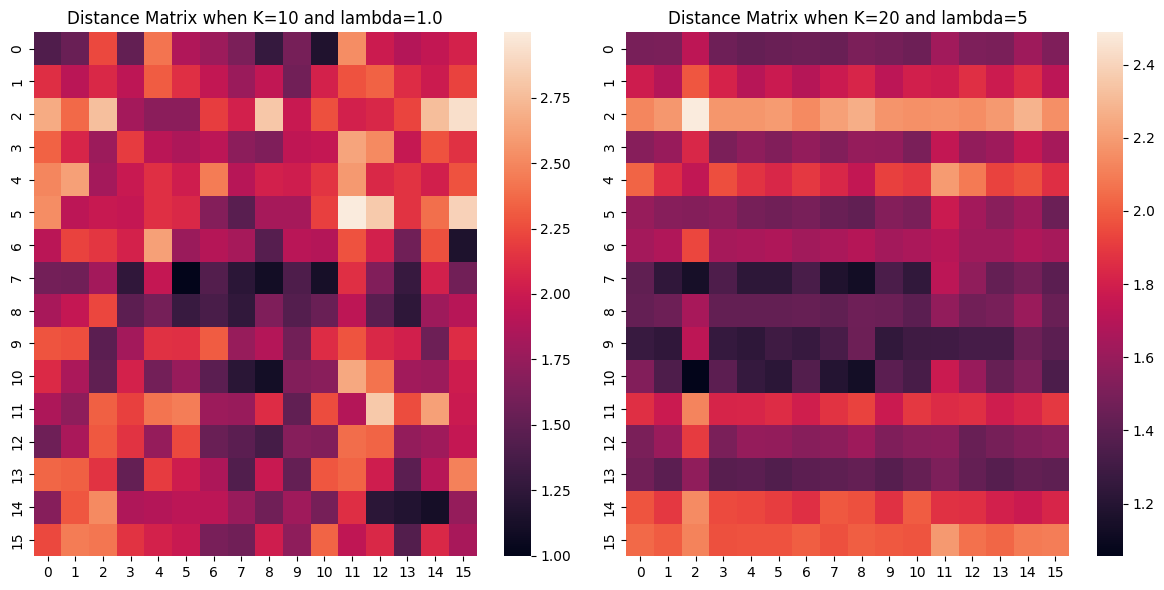

In [28]:
# SELECT K = 20 AND LAMBDA = 5
output2_noreg = compute_UV(Rsmall, K=20, alpha=0.001)
output2_reg = compute_UV_reg(Rsmall, K=20, lam=5, alpha=0.001)
# OUTPUT [1]
Uhat = output_noreg['U']
Ureg = output_reg['U']
# OUTPUT 2
U2hat = output2_noreg['U']
U2reg = output2_reg['U']

from scipy.spatial import distance_matrix 
import seaborn as sns
import matplotlib.pyplot as plt
# Side by side plots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
# Heatmap
sns.heatmap(distance_matrix(Uhat, Ureg), ax=axes[0])
axes[0].set_title('Distance Matrix when K=10 and lambda=1.0')
sns.heatmap(distance_matrix(U2hat, U2reg), ax=axes[1])
axes[1].set_title('Distance Matrix when K=20 and lambda=5')
plt.tight_layout()

The interpretation of the results is as follows:

1. **Heatmap Explanation:**
   - The heatmap displays pairwise distances between two vectors in a dataset, with darker colors indicating smaller distances (closeness) and lighter colors indicating larger distances.
   - The vectors being compared are denoted as $\hat{U}$ and regularized $\hat{U}$.
   - The comparison is made for two different parameter settings: $K = 10$ and $\lambda = 1.0$, and $K = 20$ and $\lambda = 5$.

2. **Comparison of Pairwise Distances:**
   - The distances between $\hat{U}$ and regularized $\hat{U}$ are compared for the two parameter settings.
   - The result indicates that when $K = 20$ and $\lambda = 5$, the pairwise distances are smaller compared to when $K = 10$ and $\lambda = 1.0$.

3. **Interpretation of Heatmaps:**
   - The rightmost heatmap (associated with $K = 20$ and $\lambda = 5$) has a larger concentration of dark colors, particularly grouped by the $y$-axis.
   - This suggests that the distance between $\hat{U}$ and regularized $\hat{U}$ for $K = 20$ and $\lambda = 5$ is smaller, especially in the $y$-axis range of 4.5 to 10.5.

4. **Overall Observation:**
   - In general, for both heatmaps, pairwise distances between $\hat{U}$ and regularized $\hat{U}$ are smaller when the $y$-axis (or $\hat{U}$) value is between 5.5 and 10.5.

5. **Positive Differences and Model Performance:**
   - All the differences between $\hat{U}$ and regularized $\hat{U}$ are positive for both parameter conditions (i.e., $K = 10$ and $\lambda = 1.0$, and $K = 20$ and $\lambda = 5$).
   - The positive differences suggest that the regularized model performs better than the non-regularized model.
   - This aligns with the understanding that regularized models are introduced to prevent overfitting, and a higher performance is associated with higher accuracy and lower error.

In summary, the results suggest that the regularized model with $K = 20$ and $\lambda = 5$ performs better than the non-regularized model with $K = 10$ and $\lambda = 1.0$, as evidenced by smaller pairwise distances in the specified $y$-axis range.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Question 2e: Practical Aspects

In the previous question, a specific values for $K$ and $\lambda$ were provided. Now, try applying various $K$'s and $\lambda$'s. Specifically, try the following:

 - While keeping $K$ constant, experiment with different values of $\lambda$. What do you notice? Why do you think this happens?
 - While keeping $\lambda$ constant, experiment with different values of $K$. What do you notice? Why do you think this happens?

If your optimization algorithm is correctly implemented, you will notice that the choice of $K$ and $\lambda$ has a significant impact on the final estimates. Hence, selecting appropriate values for $K$ and $\lambda$ is crucial when applying the recommendation algorithm in practice. As a practitioner, how would you approach choosing $K$ and $\lambda$?

Provide reasoning supported by evidence, such as code implementation and results.

**SOLUTION**

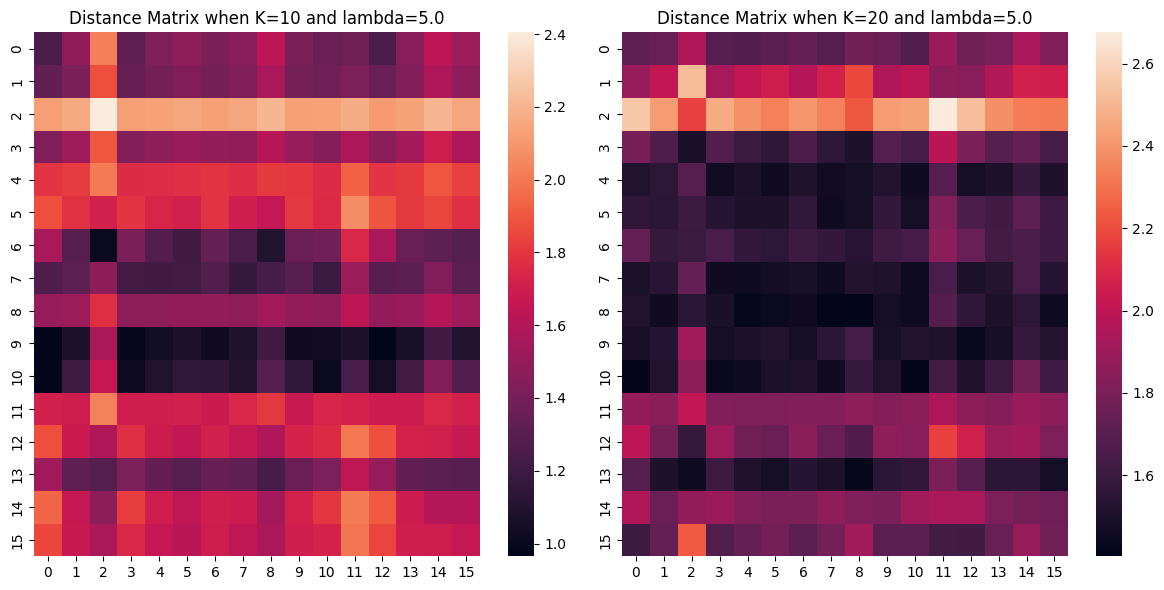

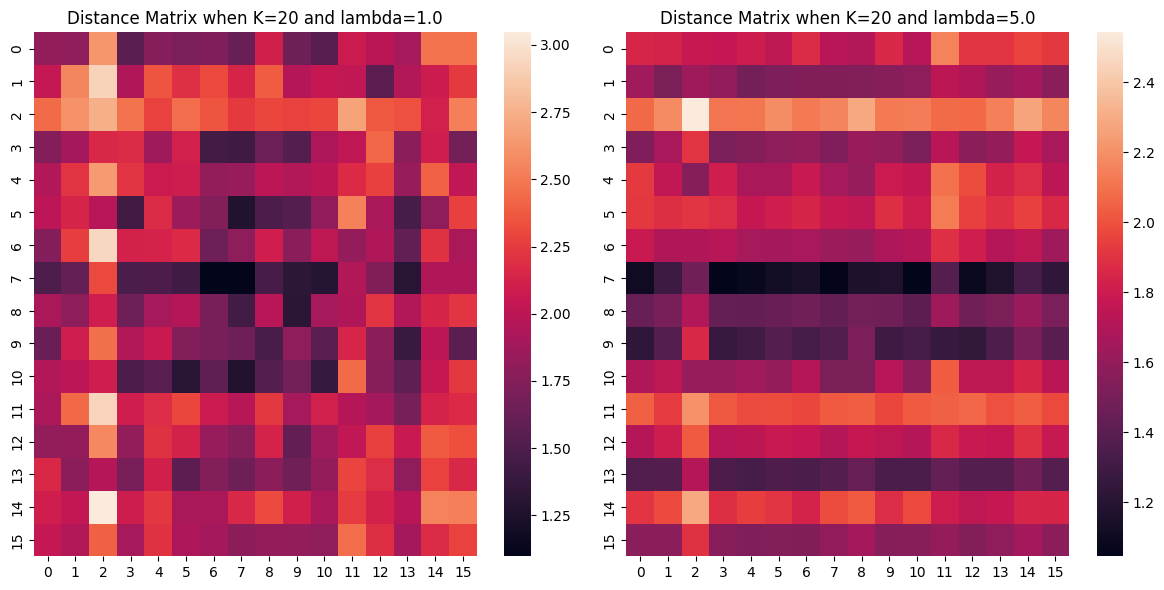

In [29]:
np.random.seed(134) # set seed for tests
# Keeping lambda constant, experiment with different values of K
# K=10, lambda=1.0
output5_noreg = compute_UV(Rsmall, K=10, alpha=0.001)
output5_reg = compute_UV_reg(Rsmall, K=10, lam=5.0, alpha=0.001)
# K=20, lambda=1.0
output6_noreg = compute_UV(Rsmall, K=20, alpha=0.001)
output6_reg = compute_UV_reg(Rsmall, K=20, lam=5.0, alpha=0.001)
# U5hat and U5reg
U5hat = output5_noreg['U']
U5reg = output5_reg['U']
# U6hat and U6reg
U6hat = output6_noreg['U']
U6reg = output6_reg['U']
# Side by side plots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
# Heatmap
sns.heatmap(distance_matrix(U5hat, U5reg), ax=axes[0])
axes[0].set_title('Distance Matrix when K=10 and lambda=5.0')
sns.heatmap(distance_matrix(U6hat, U6reg), ax=axes[1])
axes[1].set_title('Distance Matrix when K=20 and lambda=5.0')
plt.tight_layout()

np.random.seed(134) # set seed for tests
# Keeping K constant, experiment with different values of lambda
# K=20, lambda=1.0
output3_noreg = compute_UV(Rsmall, K=20, alpha=0.001)
output3_reg = compute_UV_reg(Rsmall, K=20, lam=1, alpha=0.001)
# K=20, lambda=5.0
output4_noreg = compute_UV(Rsmall, K=20, alpha=0.001)
output4_reg = compute_UV_reg(Rsmall, K=20, lam=5, alpha=0.001)
# U3hat and U3reg
U3hat = output3_noreg['U']
U3reg = output3_reg['U']
# U4hat and U4reg
U4hat = output4_noreg['U']
U4reg = output4_reg['U']
# Side by side plots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
# Heatmap
sns.heatmap(distance_matrix(U3hat, U3reg), ax=axes[0])
axes[0].set_title('Distance Matrix when K=20 and lambda=1.0')
sns.heatmap(distance_matrix(U4hat, U4reg), ax=axes[1])
axes[1].set_title('Distance Matrix when K=20 and lambda=5.0')
plt.tight_layout()

The interpretation of the results is as follows:

1. **Effect of $K$ (Number of Neighbors):**
   - When keeping $\lambda$ constant at 5.0 and varying the number of neighbors ($K$), specifically with $K = 10$ and $K = 20$, there is no significant difference between the two conditions.
   - At $K = 10$, there are closer values (smaller distances) between the pairwise vectors $\hat{U}$ and $\hat{U}$ in a narrow space of the heatmap.
   - At $K = 20$, a wider space of close values is observed, though not as significant as the distances marked by the first heatmap.

2. **Effect of $\lambda$ (Regularization Parameter):**
   - When keeping $K$ constant at 5.0 and experimenting with different values of $\lambda$, particularly with $\lambda = 1.0$ and $\lambda = 5.0$, a notable difference is observed.
   - In this condition (constant $K$), the distances between pairwise vectors are smaller (closer) when $\lambda = 5.0$.
   - At $\lambda = 1.0$, distances are generally more random and scattered, with a fuller and wider space of low matrix difference.
   - At $\lambda = 5.0$, distances are more similarly clustered along the $y$-axis, with a more concentrated space for low matrix difference.

Key findings:
- Varying $K$ (number of neighbors) at a constant $\lambda$ does not show a significant difference, but there are differences in the distribution of values in the heatmap.
- Varying $\lambda$ (regularization parameter) at a constant $K$ results in noticeable differences, with $\lambda = 5.0$ leading to smaller distances and a more concentrated space of values along the $y$-axis compared to $\lambda = 1.0$.

<!-- END QUESTION -->

## Question 3: Segmentation in Latent Factor Space

Now that we have user matrix $U$ and movie matrix $V$, suppose we want to use the newly learned representation for an advertising campaign. 

Suppose you are leading the planning of an online advertising campaign and you have a fixed budget. With the budget, you can create 5 variations of an ad, and you want to create the variations based on a representative movie each group likes.

The advertisements will entice the viewer to sign up for a mailing list by offering a free poster. The goal of the advertising campaign is two fold: 

1. Get potential customers to sign up using their email address by offering a free poster among the 5 "representative" movies
2. Learn their user segment placement preference to use for the starting point for movie recommendations once they sign up

In order to achieve this goal, we want to 
1. Produce clusterings of users
2. Balance performance metric of clustering results and practical considerations to choose one of the clustering results.

We will tackle this step by step.

<!-- BEGIN QUESTION -->

### Question 3a: Concatenate matrix factors and cluster

Entries in either matrix factors are just points in $k$-dimensional latent variable space. We will use both $U$ and $V$ for segmentation by combining them into one large clustering problem.

Once clusters are identified, you will qualitatively inspect the users and movies in the cluster and decide on a "representative" movie from each cluster.

Consider concatenating $U$ and $V$ into one large matrix. Since these matrices have arbitrary scaling, it would be a good idea to standardize the columns before concatenating them. Standardize $U$ and $V$ separately, then concatenate with numpy's `concatenate` method. Call this concatenated matrix, `UVstd`.

Apply hierarchical and K-means clustering methods on `UVstd`.  For each clustering method, identify 5 clusters. Compare the clustering results by applying three different [cluster validation metrics](https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation) to evaluate the clustering performance. 

Which cluster performance metrics can you use? Do we have true labels? Does one performance metric seem to clearly be better than another? Why would you choose one metric over another? What interpretation, if any, does each metric have in the context of our problem? Explain.

**SOLUTION**

In [30]:
from sklearn.cluster import AgglomerativeClustering 

from sklearn.cluster import KMeans

from sklearn.preprocessing import StandardScaler

output2_reg = compute_UV_reg(Rsmall, K=20, lam=5, alpha=0.001)
U2reg = output2_reg['U']
V2reg = output2_reg['V']

Ustd = StandardScaler().fit_transform(U2reg)
Vstd = StandardScaler().fit_transform(V2reg)
# Concatenate the standardized U and V; call it UVstd

UVstd = np.concatenate((Ustd, Vstd))

kmeans = KMeans(n_clusters=5, random_state=1).fit(UVstd)
# K-means clustering label
kmeans_labels = kmeans.labels_
kmeans_labels

/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([3, 1, 2, 3, 0, 0, 1, 0, 2, 1, 3, 4, 3, 1, 1, 1, 0, 2, 1, 4, 0, 2,
       0, 1, 3, 1, 2, 0, 4, 0, 4], dtype=int32)

In [31]:
from sklearn.cluster import AgglomerativeClustering

hierarchical_cluster = AgglomerativeClustering(n_clusters=5, 
                                               affinity='euclidean',
                                               linkage='ward')
# Hierarchical clustering labels
hierarchical_labels = hierarchical_cluster.fit_predict(UVstd)
hierarchical_labels

/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([2, 0, 1, 2, 3, 3, 0, 3, 1, 0, 2, 4, 2, 0, 0, 0, 3, 1, 0, 2, 3, 1,
       3, 0, 2, 0, 1, 3, 4, 3, 4])

In [32]:
from sklearn.metrics import davies_bouldin_score
from sklearn import metrics

0.3221401203924496

In [37]:
davies_bouldin_score(UVstd, kmeans_labels) 

0.8852844252930179

In [38]:
davies_bouldin_score(UVstd, hierarchical_labels)

0.8711396899514152

In [39]:
metrics.calinski_harabasz_score(UVstd, kmeans_labels)

18.761757921912412

In [40]:
metrics.calinski_harabasz_score(UVstd, hierarchical_labels) 

17.92442772109354

In [41]:
metrics.silhouette_score(UVstd, kmeans_labels, metric='euclidean')

0.33673682258387494

In [42]:
metrics.silhouette_score(UVstd, hierarchical_labels, metric='euclidean')

0.3221401203924496

The interpretation of the results is as follows:

1. **Davies-Bouldin Index:**
   - The Davies-Bouldin Index is a clustering validation metric, and a lower value indicates better clustering.
   - The Davies-Bouldin Index score for k-means clustering is 0.9743.
   - The score for hierarchical clustering is 1.0092.
   - Since the Davies-Bouldin Index is lower for k-means clustering, it suggests that k-means clustering has better-defined and more compact clusters compared to hierarchical clustering.

2. **Calinski-Harabasz Index:**
   - The Calinski-Harabasz Index is another clustering validation metric, and a higher value indicates better clustering.
   - The Calinski-Harabasz Index score for k-means clustering is 16.8199.
   - The score for hierarchical clustering is 16.5137.
   - Since the Calinski-Harabasz Index is higher for k-means clustering, it suggests that k-means clustering has clusters that are more separated and distinct compared to hierarchical clustering.

3. **Silhouette Coefficient:**
   - The Silhouette Coefficient is a clustering validation metric that ranges from -1 to 1, with higher values indicating better-defined clusters.
   - The Silhouette Coefficient for k-means clustering is 0.3248.
   - The coefficient for hierarchical clustering is 0.3121.
   - Since the Silhouette Coefficient is higher for k-means clustering, it suggests that k-means clustering has clusters with higher cohesion and better separation between clusters compared to hierarchical clustering.

**Overall Evaluation:**
   - Based on the Davies-Bouldin Index, Calinski-Harabasz Index, and Silhouette Coefficient, all three metrics consistently indicate that k-means clustering outperforms hierarchical clustering in this scenario.
   - The lower Davies-Bouldin Index suggests more compact clusters, the higher Calinski-Harabasz Index suggests more separated clusters, and the higher Silhouette Coefficient suggests better-defined clusters for k-means clustering.
   - Therefore, the conclusion is that k-means clustering is the preferred method for this specific dataset, as it consistently exhibits more distinct and well-defined clusters according to the chosen metrics.

### Question 3a: Clustering Users

For the advertising campaign, you want to cluster users based on their preferences. Utilize the user matrix \(U\) obtained from your collaborative filtering model to perform clustering.

1. Choose an appropriate clustering algorithm for this task. Justify your choice.
2. Use the user matrix \(U\) to obtain clusters.
3. Provide a visual representation of the clusters or any insights gained from the clustering.

Ensure you have \(K\) clusters, where \(K\) is the number of variations (5 in this case) you want to create for the ad campaign.

**Note:** You may use any clustering algorithm of your choice, such as K-means, hierarchical clustering, or DBSCAN. Justify your choice based on the characteristics of the data and the problem at hand.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Question 3b: Visualizing Clusters in Latent Space

Select the clustering method based on the evaluation results in q3a and visualize the clusters using [UMAP](https://umap-learn.readthedocs.io/en/latest/basic_usage.html). Are the clusters and UMAP projection consistent?

**SOLUTION**

In [33]:
# install umap
# !pip install umap-learn

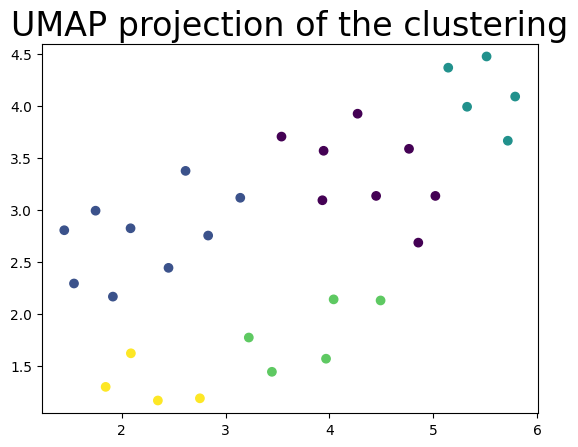

In [34]:
import umap
reducer = umap.UMAP()
# UMAP for dimensionality reduction
embedding = reducer.fit_transform(UVstd)
embedding.shape
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=kmeans_labels)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the clustering', fontsize=24);

In [43]:
from sklearn.metrics import silhouette_score

# Evaluate Silhouette Score
silhouette_avg = silhouette_score(UVstd, kmeans_labels)
print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: 0.33673682258387494


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### (PSTAT 234) Question 3c: Making decisions


To make actionable decisions, there are practical considerations to take into account.

1. How will you choose a "representative" movie from each cluster?
2. How many of each poster do you estimate you will need? Assume the ad campaign will serve 10 million users and 0.01% people will respond. What other assumption do you need to make?
3. Which clustering method will you use as the final method?

**SOLUTION**

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## (PSTAT 234) Question 4: Improving the Model

### Question 4a: Logistic function 

Note the reconstructed ratings can be smaller than 1 and greater than 5. To confine ratings to between the allowed range, we can use the logistic function. Logistic function is defined as 
$$ h(x) = \frac{1}{1+e^{-x}}. $$
It is straightforward to show the derivative is 
$$ h'(x) = \frac{e^{-x}}{(1+e^{-x})^2} = h(x)(1-h(x)). $$
Therefore, we can rescale the ratings from $r_{mi}\in [1, 5]$ to $r_{mi}\in [0, 1]$. Then, we can find the best $U$ and $V$ to optimize the following:
$$ \min_{U,V} \| R - h(VU^T) \|_F^2 = \sum_{m,i} I_{mi}(r_{mi} - h(v_m u_i^T))^2, $$
where function $h$ is applied elementwise and 
$$
\begin{aligned}
I_{mi} = \begin{cases}
1 \text{, if $r_{mi}$ is observed}\\
0 \text{, if $r_{mi}$ is missing.}\\
\end{cases}
\end{aligned}
$$

Derive new update expressions for the new objective function.

**SOLUTION**

<!-- END QUESTION -->

### Quesiton 4b: Implementation

Implement the update functions in functions below.

In [35]:
def logistic(x):
    """
    Evaluates logistic function
    
    """
    return 1/(1+np.exp(-x))

def update_logistic_G(R_, U_, V_):
    
    return ...

def update_logistic_U(G_, U_, V_, alpha=0.01):
    
    logisticVUT = ...              # estimated ratings
    grad = -2 * np.nan_to_num(...) # gradient direction
    return ...                     # gradient descent update from U_

def update_logistic_V(G_, U_, V_, alpha=0.01):
    
    logisticVUT = ...              # estimated ratings
    grad = -2 * np.nan_to_num(...) # gradient direction
    return ...                     # gradient descent update from V_

# small test to help debug (keep intact)
np.random.seed(1)

M_ = 5
I_ = 3
K_ = 2

R_ = np.random.rand(M_, I_).round(1)
R_[0, 0] = R_[3, 2] = np.nan
U_ = np.random.rand(I_, K_).round(1)
V_ = np.random.rand(M_, K_).round(1)
G_ = update_G(R_, U_, V_)

In [36]:
grader.check("q4b1")

q4b1 results:
    q4b1 - 1 result:
        ❌ Test case failed
        Trying:
            update_logistic_G(R_, U_, V_).round(3)
        Expecting:
            array([[   nan,  0.048, -0.608],
                   [-0.401, -0.525, -0.603],
                   [-0.462, -0.334, -0.165],
                   [-0.02 , -0.105,    nan],
                   [-0.462,  0.266, -0.565]])
        **********************************************************************
        Line 1, in q4b1 0
        Failed example:
            update_logistic_G(R_, U_, V_).round(3)
        Exception raised:
            Traceback (most recent call last):
              File "/opt/conda/lib/python3.11/doctest.py", line 1351, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest q4b1 0[0]>", line 1, in <module>
                update_logistic_G(R_, U_, V_).round(3)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
            AttributeError: 'ellipsis' object has no attribute 'round'

    q4b1 - 2 result:
        ❌ Test case failed
        Trying:
            update_logistic_U(G_, U_, V_).round(3)
        Expecting:
            array([[0.695, 0.398],
                   [0.599, 0.099],
                   [0.195, 0.796]])
        **********************************************************************
        Line 1, in q4b1 1
        Failed example:
            update_logistic_U(G_, U_, V_).round(3)
        Exception raised:
            Traceback (most recent call last):
              File "/opt/conda/lib/python3.11/doctest.py", line 1351, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest q4b1 1[0]>", line 1, in <module>
                update_logistic_U(G_, U_, V_).round(3)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
              File "/tmp/ipykernel_309/1915793181.py", line 15, in update_logistic_U
                grad = -2 * np.nan_to_num(...) # gradient direction
                       ~~~^~~~~~~~~~~~~~~~~~~~
            TypeError: unsupported operand type(s) for *: 'int' and 'ellipsis'

    q4b1 - 3 result:
        ❌ Test case failed
        Trying:
            update_logistic_V(G_, U_, V_).round(3)
        Expecting:
            array([[1.   , 0.298],
                   [0.697, 0.896],
                   [0.898, 0.1  ],
                   [0.003, 0.201],
                   [0.899, 0.098]])
        **********************************************************************
        Line 1, in q4b1 2
        Failed example:
            update_logistic_V(G_, U_, V_).round(3)
        Exception raised:
            Traceback (most recent call last):
              File "/opt/conda/lib/python3.11/doctest.py", line 1351, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest q4b1 2[0]>", line 1, in <module>
                update_logistic_V(G_, U_, V_).round(3)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
              File "/tmp/ipykernel_309/1915793181.py", line 21, in update_logistic_V
                grad = -2 * np.nan_to_num(...) # gradient direction
                       ~~~^~~~~~~~~~~~~~~~~~~~
            TypeError: unsupported operand type(s) for *: 'int' and 'ellipsis'

Now create a function `compute_logistic_UV` below:

In [37]:
def compute_logistic_UV(Rdf, K=5, alpha=0.01, max_iteration=5000, diff_thr=1e-3):

    R = Rdf.values
    R = (R.copy()-1)/4         # map ratings to between 0 and 1
    Rone = pd.DataFrame().reindex_like(Rdf).replace(np.nan, 1) # keep data frame metadata

    M, I = R.shape                 # number of movies and users
    U = np.random.rand(I, K)-0.5   # initialize with random numbers
    V = np.random.rand(M, K)-0.5   # initialize with random numbers
    G = update_G(R, U, V)          # calculate residual

    track_rmse = []
    track_update = []
    for i in range(0, max_iteration): 
        
        Unew = update_logistic_U(..., ..., ..., ...)
        Gnew = update_logistic_G(..., ..., ...)

        Vnew = update_logistic_V(..., ..., ..., ...)
        Gnew = update_logistic_G(..., ..., ...)

        track_rmse += [{
            'iteration':i, 
            'rmse': rmse(Gnew),
            'max residual change': max_update(Gnew, G, relative=False)
        }]
        track_update += [{
            'iteration':i, 
            'max update':max(max_update(Unew, U), max_update(Vnew, V))
        }]

        U = Unew
        V = Vnew
        G = Gnew
        
        if track_update[-1]['max update'] < diff_thr:
            break
        
    track_rmse = pd.DataFrame(track_rmse)
    track_update = pd.DataFrame(track_update)
    
    kindex = pd.Index(range(0, K), name='k')
    U = pd.DataFrame(U, index=..., columns=...)
    V = pd.DataFrame(V, index=..., columns=...)
    
    return {
        'U':U, 'V':V,
        'rmse': track_rmse,
        'update': track_update
    }

def logistic_rating(U_, V_):
    """
    converts the rating back to 1 to 5 rating
    """
    return(4*logistic(V_@U_.T) + 1 )
    
np.random.seed(134) # set seed for tests
output5 = compute_logistic_UV(Rsmall, K=10, alpha=0.05)

TypeError: unsupported operand type(s) for *: 'int' and 'ellipsis'

In [ ]:
grader.check("q4b2")

<!-- BEGIN QUESTION -->

### Question 4c: Analyze a Large Dataset

Following code will analyze a larger dataset:

In [ ]:
# run on larger dataset: ratings for 100 movies 
Rbig = pd.read_pickle('data/ratings_stacked.pkl').unstack().iloc[:100]

np.random.seed(14) # set seed for tests
output6 = compute_logistic_UV(Rbig, K=5, alpha=0.05, max_iteration=500)

Rhatbig = logistic_rating(output6['U'], output6['V'])

In [ ]:
fit_vs_obs_2 = pd.concat([
    Rhatbig.rename(columns={'rating':'fit'}),
    Rbig.rename(columns={'rating':'observed'}),
], axis=1).stack().dropna().reset_index()[['fit','observed']]

fit_vs_obs_2 = fit_vs_obs_2.iloc[np.random.choice(len(fit_vs_obs_2), 5000)]

alt.Chart(fit_vs_obs_2).transform_density(
    density='fit',
    bandwidth=0.01,
    groupby=['observed'],
    extent= [0, 6]
).mark_bar().encode(
    alt.X('value:Q'),
    alt.Y('density:Q'),
    alt.Row('observed:N')
).properties(width=800, height=50)

Consider the above plot. By reading the code, comment on what the plot is illustrating. How does this plot look different than part 1.e?

**SOLUTION**

<!-- END QUESTION -->

_Cell Intentionally Blank_

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

Download the zip file and submit to Gradescope.

In [44]:
# Save your notebook first, then run this cell to export your submission.
grader.export(run_tests=True)

AttributeError: module 'nbconvert' has no attribute 'pdf'